In [1]:
%matplotlib inline 
import pandas as pd

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [4]:
# Date is irrelevant
# Sunshine and Evaporation have over 60k nans
# RISK_MM is too correlated
# Cloud 9am, Cloud 3pm 50k nans
# WindDir, we are measuring form different locations
df = df.drop(columns=['Date', 'Sunshine', 'Evaporation', 'RISK_MM', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'Location'])
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [5]:
df.isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [6]:
df = df.dropna()
df.shape

(119590, 14)

In [7]:
df.head()
df['RainToday'] = df['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1)
df.head()
y = df['RainTomorrow']
X = df.drop(columns=['RainTomorrow'])
save_rain = X['RainToday']
X = X.drop(columns=['RainToday'])
X = (X - X.mean())/X.std()
X.head()
X['RainToday'] = save_rain
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.159159,-0.083870,-0.203299,0.288756,0.640741,0.566867,0.141679,-1.395053,-1.402508,-1.161488,-0.044318,-0.026148,0
1,-0.783120,0.231020,-0.274178,0.288756,-1.178196,0.336328,-1.269770,-1.250068,-0.993970,-1.061765,0.002197,0.339734,0
2,0.080636,0.316899,-0.274178,0.437127,0.527058,0.797406,-1.583426,-1.008426,-1.416596,-0.933549,0.591398,0.178746,0
3,-0.500436,0.646101,-0.274178,-1.194951,-0.382411,-1.162173,-1.217494,-1.685023,-0.007845,-0.349454,0.141745,0.661710,0
4,0.803050,1.261567,-0.156046,0.066200,-0.837145,0.105790,0.716714,-0.863441,-0.965795,-1.318197,0.095229,1.130039,0


In [8]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


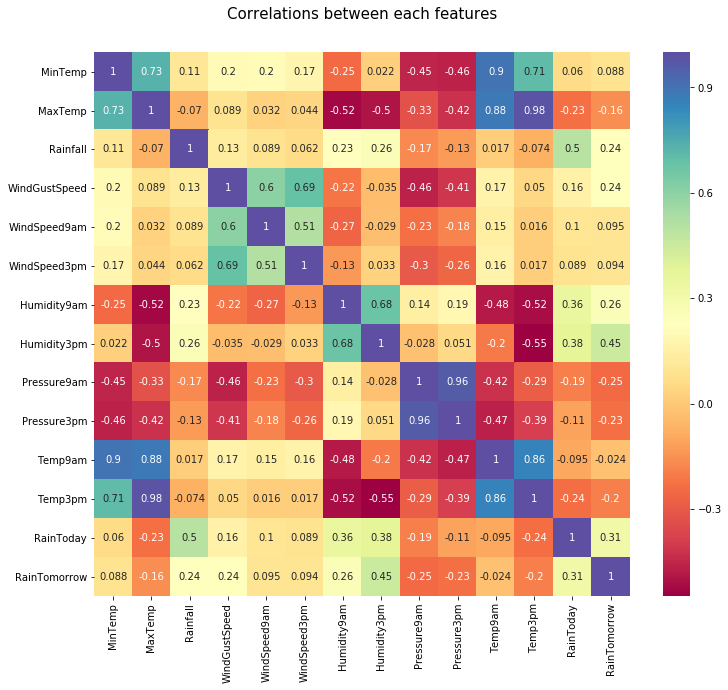

In [9]:
# update: the correlations to RainToday and RainTomorrow are also included.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
colormap = plt.cm.Spectral
plt.title('Correlations between each features', y=1.05, size=15)
corrs = df.corr()
sns.heatmap(corrs, cmap = colormap, linecolor = 'white', annot = True)

Text(0,0.5,'Correlation to RainTomorrow')

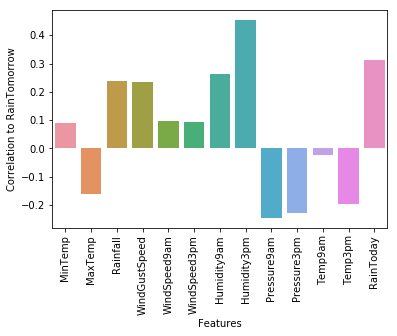

In [10]:
#raintomorrow_corrs = corrs[['RainTomorrow']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
raintomorrow_corrs = corrs[['RainTomorrow']].drop(['RainTomorrow'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'RainTomorrow', data = raintomorrow_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to RainTomorrow')

## Partitioning the Dataset
Below we partition the dataset into training, validation, and test sets.

In [11]:
val_size   = int(.2 * df.shape[0])
test_size  = int(.1 * df.shape[0])
train_size = int(.7 * df.shape[0])
df_train = df[:train_size]
df_val = df[train_size : train_size + val_size]
df_test = df[train_size + val_size : train_size + val_size + test_size]

print(f"Training data length:   {len(df_train)}")
print(f"Validation data length: {len(df_val)}")
print(f"Test data length:       {len(df_test)}")

Training data length:   83713
Validation data length: 23918
Test data length:       11959


### Splitting Into Targets and Labels
Below the train, test, and validation data sets are split into labels and targets then converted to numpy arrays.

In [12]:
df_train.head()
y_train = df_train['RainTomorrow'].values
y_test = df_test['RainTomorrow'].values
y_val = df_val['RainTomorrow'].values
X_train = df_train.drop(columns=['RainTomorrow']).values
X_test = df_test.drop(columns=['RainTomorrow']).values
X_val = df_val.drop(columns=['RainTomorrow']).values


## Tensorflow Feed Forward Neural Network
Below we define a feed forward neural network. The network takes as input the features of a single day. The output is a sigmoid layer meaning our output layer is essentially a logistic regression layer. We use binary cross entropy loss and accuracy to evaluate model performace. The model is evaluated on validation data on every epoch.

In [13]:
import tensorflow as tf
from tensorflow import keras

INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = 1
EPOCHS = 10
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(16, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(16, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


## Training the Network
### Train the base line model with all the features
Here we fit the network onto the training data set for 10 epochs. We use our validation data to prevent overfitting.

In [14]:
from keras.callbacks import History 

history = History()
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[history])

Using TensorFlow backend.


Train on 83713 samples, validate on 23918 samples
Epoch 1/10
83713/83713 [==============================] - 1s 17us/step - loss: 0.4152 - acc: 0.8212 - binary_crossentropy: 0.4152 - val_loss: 0.3832 - val_acc: 0.8336 - val_binary_crossentropy: 0.3832
Epoch 2/10
83713/83713 [==============================] - 1s 12us/step - loss: 0.3932 - acc: 0.8348 - binary_crossentropy: 0.3932 - val_loss: 0.3739 - val_acc: 0.8542 - val_binary_crossentropy: 0.3739
Epoch 3/10
83713/83713 [==============================] - 1s 12us/step - loss: 0.3925 - acc: 0.8358 - binary_crossentropy: 0.3925 - val_loss: 0.3557 - val_acc: 0.8511 - val_binary_crossentropy: 0.3557
Epoch 4/10
83713/83713 [==============================] - 1s 13us/step - loss: 0.3869 - acc: 0.8374 - binary_crossentropy: 0.3869 - val_loss: 0.4042 - val_acc: 0.8320 - val_binary_crossentropy: 0.4042
Epoch 5/10
83713/83713 [==============================] - 1s 12us/step - loss: 0.3867 - acc: 0.8376 - binary_crossentropy: 0.3867 - val_loss: 0.35

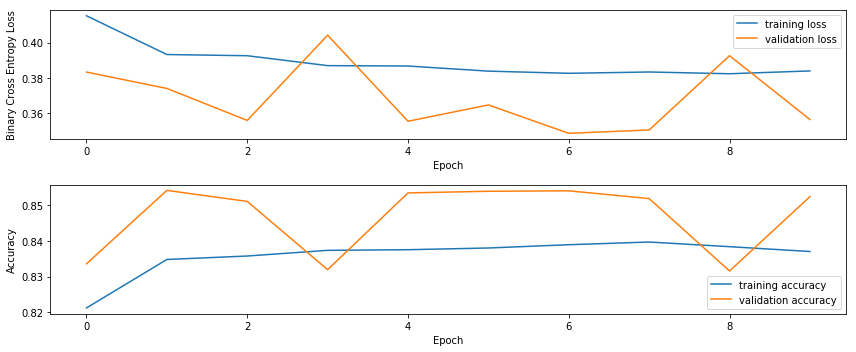

In [15]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
train_acc = history.history['acc']
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# Loss Axis
ax1.plot(list(range(EPOCHS)), train_loss)
ax1.plot(list(range(EPOCHS)), val_loss)
ax1.set_xlabel('Epoch')
ax1.legend(['training loss', 'validation loss'])
ax1.set_ylabel('Binary Cross Entropy Loss')

# Accuracy Axis
ax2.plot(list(range(EPOCHS)), train_acc)
ax2.plot(list(range(EPOCHS)), val_acc)
ax2.legend(['training accuracy', 'validation accuracy'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [16]:
test_loss, test_acc, t = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}\nTest Accuracy: {test_acc}")

11959/11959 [==============================] - 0s 16us/step
Test Loss: 0.3003399411755438
Test Accuracy: 0.874236976335814


### Now train models with different features dropped
In this section, We picked the top 5 most correlated features, and then drop them one by one. The one that affects test accuracy the most would be the most representative feature in our prediction. 

Here, we rank the features based on the absolute value of their correlations, which represent the strength of correlation.

In [17]:
raintomorrow_corrs['RainTomorrow'] = [abs(i) for i in raintomorrow_corrs['RainTomorrow']]
raintomorrow_corrs = raintomorrow_corrs.sort_values(by = 'RainTomorrow', ascending = False)
raintomorrow_corrs

,index,RainTomorrow
7,Humidity3pm,0.452645
12,RainToday,0.313718
6,Humidity9am,0.261379
8,Pressure9am,0.246457
2,Rainfall,0.237833
3,WindGustSpeed,0.236001
9,Pressure3pm,0.228156
11,Temp3pm,0.195060
1,MaxTemp,0.160257
4,WindSpeed9am,0.095100


#### Humidity 3pm

Train on 83713 samples, validate on 23918 samples
Epoch 1/10
83713/83713 [==============================] - 1s 18us/step - loss: 0.5170 - acc: 0.7749 - binary_crossentropy: 0.5170 - val_loss: 0.4920 - val_acc: 0.7814 - val_binary_crossentropy: 0.4920
Epoch 2/10
83713/83713 [==============================] - 1s 12us/step - loss: 0.4826 - acc: 0.7764 - binary_crossentropy: 0.4826 - val_loss: 0.4331 - val_acc: 0.7814 - val_binary_crossentropy: 0.4331
Epoch 3/10
83713/83713 [==============================] - 1s 13us/step - loss: 0.4693 - acc: 0.7805 - binary_crossentropy: 0.4693 - val_loss: 0.4624 - val_acc: 0.7814 - val_binary_crossentropy: 0.4624
Epoch 4/10
83713/83713 [==============================] - 1s 12us/step - loss: 0.4675 - acc: 0.7810 - binary_crossentropy: 0.4675 - val_loss: 0.4303 - val_acc: 0.8217 - val_binary_crossentropy: 0.4303
Epoch 5/10
83713/83713 [==============================] - 1s 12us/step - loss: 0.4602 - acc: 0.7815 - binary_crossentropy: 0.4602 - val_loss: 0.44

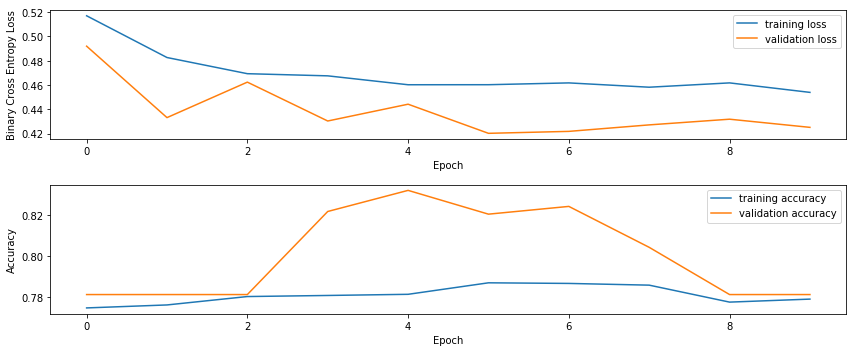

11959/11959 [==============================] - 0s 14us/step
Test Loss: 0.3643810967767963
Test Accuracy: 0.8203027008947237


In [18]:
X_train_h3pm = df_train.drop(columns=['RainTomorrow', 'Humidity3pm']).values
X_test_h3pm = df_test.drop(columns=['RainTomorrow', 'Humidity3pm']).values
X_val_h3pm = df_val.drop(columns=['RainTomorrow', 'Humidity3pm']).values

INPUT_DIM = X_train_h3pm.shape[1]
OUTPUT_DIM = 1
EPOCHS = 10
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(16, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(16, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])

history = History()
model.fit(X_train_h3pm, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_h3pm, y_val), callbacks=[history])

val_loss_h3pm = history.history['val_loss']
train_loss_h3pm = history.history['loss']
val_acc_h3pm = history.history['val_acc']
train_acc_h3pm = history.history['acc']
plt.rcParams['figure.figsize'] = [12, 5]

ax1_h3pm = plt.subplot(211)
ax2_h3pm = plt.subplot(212)

# Loss Axis
ax1_h3pm.plot(list(range(EPOCHS)), train_loss_h3pm)
ax1_h3pm.plot(list(range(EPOCHS)), val_loss_h3pm)
ax1_h3pm.set_xlabel('Epoch')
ax1_h3pm.legend(['training loss', 'validation loss'])
ax1_h3pm.set_ylabel('Binary Cross Entropy Loss')

# Accuracy Axis
ax2_h3pm.plot(list(range(EPOCHS)), train_acc_h3pm)
ax2_h3pm.plot(list(range(EPOCHS)), val_acc_h3pm)
ax2_h3pm.legend(['training accuracy', 'validation accuracy'])
ax2_h3pm.set_xlabel('Epoch')
ax2_h3pm.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

test_loss_h3pm, test_acc_h3pm, t = model.evaluate(X_test_h3pm, y_test)
print(f"Test Loss: {test_loss_h3pm}\nTest Accuracy: {test_acc_h3pm}")


#### Rain Today

Train on 83713 samples, validate on 23918 samples
Epoch 1/10
83713/83713 [==============================] - 2s 18us/step - loss: 0.4111 - acc: 0.8225 - binary_crossentropy: 0.4111 - val_loss: 0.4075 - val_acc: 0.8206 - val_binary_crossentropy: 0.4075
Epoch 2/10
83713/83713 [==============================] - 1s 13us/step - loss: 0.4043 - acc: 0.8316 - binary_crossentropy: 0.4043 - val_loss: 0.3898 - val_acc: 0.8263 - val_binary_crossentropy: 0.3898
Epoch 3/10
83713/83713 [==============================] - 1s 12us/step - loss: 0.3978 - acc: 0.8332 - binary_crossentropy: 0.3978 - val_loss: 0.3716 - val_acc: 0.8497 - val_binary_crossentropy: 0.3716
Epoch 4/10
83713/83713 [==============================] - 1s 14us/step - loss: 0.3963 - acc: 0.8335 - binary_crossentropy: 0.3963 - val_loss: 0.3577 - val_acc: 0.8548 - val_binary_crossentropy: 0.3577
Epoch 5/10
83713/83713 [==============================] - 1s 15us/step - loss: 0.3954 - acc: 0.8345 - binary_crossentropy: 0.3954 - val_loss: 0.37

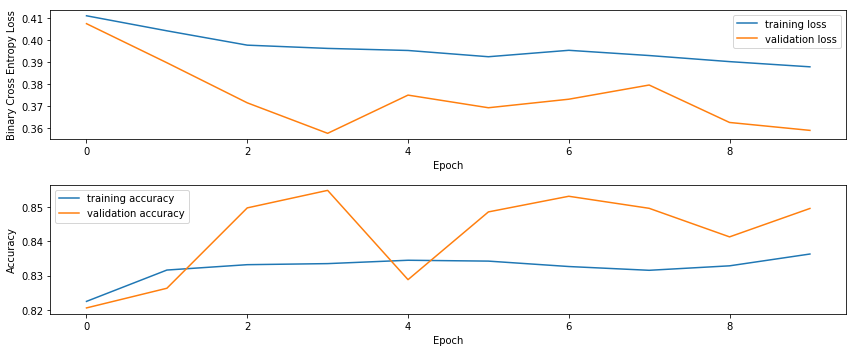

11959/11959 [==============================] - 0s 15us/step
Test Loss: 0.2993998435777681
Test Accuracy: 0.8759093569696463


In [19]:
X_train_rt = df_train.drop(columns=['RainTomorrow', 'RainToday']).values
X_test_rt = df_test.drop(columns=['RainTomorrow', 'RainToday']).values
X_val_rt = df_val.drop(columns=['RainTomorrow', 'RainToday']).values

INPUT_DIM = X_train_rt.shape[1]
OUTPUT_DIM = 1
EPOCHS = 10
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(16, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(16, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])

history = History()
model.fit(X_train_rt, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_rt, y_val), callbacks=[history])

val_loss_rt = history.history['val_loss']
train_loss_rt = history.history['loss']
val_acc_rt = history.history['val_acc']
train_acc_rt = history.history['acc']
plt.rcParams['figure.figsize'] = [12, 5]

ax1_rt = plt.subplot(211)
ax2_rt = plt.subplot(212)

# Loss Axis
ax1_rt.plot(list(range(EPOCHS)), train_loss_rt)
ax1_rt.plot(list(range(EPOCHS)), val_loss_rt)
ax1_rt.set_xlabel('Epoch')
ax1_rt.legend(['training loss', 'validation loss'])
ax1_rt.set_ylabel('Binary Cross Entropy Loss')

# Accuracy Axis
ax2_rt.plot(list(range(EPOCHS)), train_acc_rt)
ax2_rt.plot(list(range(EPOCHS)), val_acc_rt)
ax2_rt.legend(['training accuracy', 'validation accuracy'])
ax2_rt.set_xlabel('Epoch')
ax2_rt.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

test_loss_rt, test_acc_rt, t = model.evaluate(X_test_rt, y_test)
print(f"Test Loss: {test_loss_rt}\nTest Accuracy: {test_acc_rt}")


#### Humidity 9am

Train on 83713 samples, validate on 23918 samples
Epoch 1/10
83713/83713 [==============================] - 2s 19us/step - loss: 0.4306 - acc: 0.8197 - binary_crossentropy: 0.4306 - val_loss: 0.4516 - val_acc: 0.8398 - val_binary_crossentropy: 0.4516
Epoch 2/10
83713/83713 [==============================] - 1s 13us/step - loss: 0.4271 - acc: 0.8193 - binary_crossentropy: 0.4271 - val_loss: 0.4082 - val_acc: 0.8538 - val_binary_crossentropy: 0.4082
Epoch 3/10
83713/83713 [==============================] - 1s 13us/step - loss: 0.4211 - acc: 0.8258 - binary_crossentropy: 0.4211 - val_loss: 0.3921 - val_acc: 0.8551 - val_binary_crossentropy: 0.3921
Epoch 4/10
83713/83713 [==============================] - 1s 15us/step - loss: 0.4195 - acc: 0.8262 - binary_crossentropy: 0.4195 - val_loss: 0.3951 - val_acc: 0.8327 - val_binary_crossentropy: 0.3951
Epoch 5/10
83713/83713 [==============================] - 4s 44us/step - loss: 0.4201 - acc: 0.8264 - binary_crossentropy: 0.4201 - val_loss: 0.38

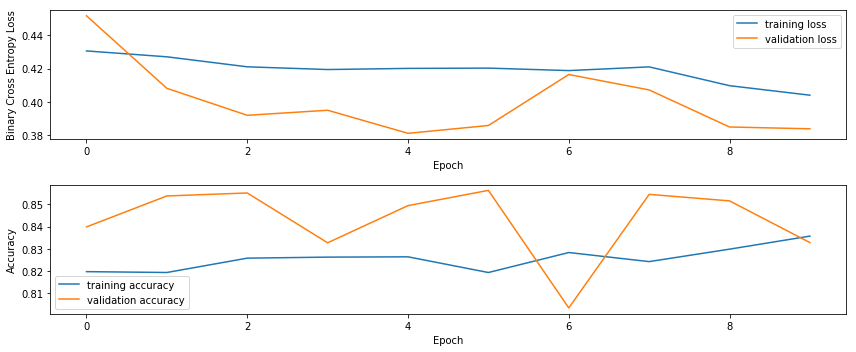

11959/11959 [==============================] - 0s 34us/step
Test Loss: 0.33757010477511157
Test Accuracy: 0.8521615519692282


In [20]:
X_train_h9am = df_train.drop(columns=['RainTomorrow', 'Humidity9am']).values
X_test_h9am = df_test.drop(columns=['RainTomorrow', 'Humidity9am']).values
X_val_h9am = df_val.drop(columns=['RainTomorrow', 'Humidity9am']).values

INPUT_DIM = X_train_h9am.shape[1]
OUTPUT_DIM = 1
EPOCHS = 10
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(16, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(16, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])

history = History()
model.fit(X_train_h9am, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_h9am, y_val), callbacks=[history])

val_loss_h9am = history.history['val_loss']
train_loss_h9am = history.history['loss']
val_acc_h9am = history.history['val_acc']
train_acc_h9am = history.history['acc']
plt.rcParams['figure.figsize'] = [12, 5]

ax1_h9am = plt.subplot(211)
ax2_h9am = plt.subplot(212)

# Loss Axis
ax1_h9am.plot(list(range(EPOCHS)), train_loss_h9am)
ax1_h9am.plot(list(range(EPOCHS)), val_loss_h9am)
ax1_h9am.set_xlabel('Epoch')
ax1_h9am.legend(['training loss', 'validation loss'])
ax1_h9am.set_ylabel('Binary Cross Entropy Loss')

# Accuracy Axis
ax2_h9am.plot(list(range(EPOCHS)), train_acc_h9am)
ax2_h9am.plot(list(range(EPOCHS)), val_acc_h9am)
ax2_h9am.legend(['training accuracy', 'validation accuracy'])
ax2_h9am.set_xlabel('Epoch')
ax2_h9am.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

test_loss_h9am, test_acc_h9am, t = model.evaluate(X_test_h9am, y_test)
print(f"Test Loss: {test_loss_h9am}\nTest Accuracy: {test_acc_h9am}")

#### Rainfall

Train on 83713 samples, validate on 23918 samples
Epoch 1/10
83713/83713 [==============================] - 2s 25us/step - loss: 0.4476 - acc: 0.8043 - binary_crossentropy: 0.4476 - val_loss: 0.5255 - val_acc: 0.7814 - val_binary_crossentropy: 0.5255
Epoch 2/10
83713/83713 [==============================] - 1s 13us/step - loss: 0.4448 - acc: 0.8053 - binary_crossentropy: 0.4448 - val_loss: 0.3955 - val_acc: 0.8218 - val_binary_crossentropy: 0.3955
Epoch 3/10
83713/83713 [==============================] - 2s 18us/step - loss: 0.4132 - acc: 0.8257 - binary_crossentropy: 0.4132 - val_loss: 0.5541 - val_acc: 0.7814 - val_binary_crossentropy: 0.5541
Epoch 4/10
83713/83713 [==============================] - 3s 35us/step - loss: 0.4328 - acc: 0.8119 - binary_crossentropy: 0.4328 - val_loss: 0.4600 - val_acc: 0.8358 - val_binary_crossentropy: 0.4600
Epoch 5/10
83713/83713 [==============================] - 2s 27us/step - loss: 0.4207 - acc: 0.8218 - binary_crossentropy: 0.4207 - val_loss: 0.45

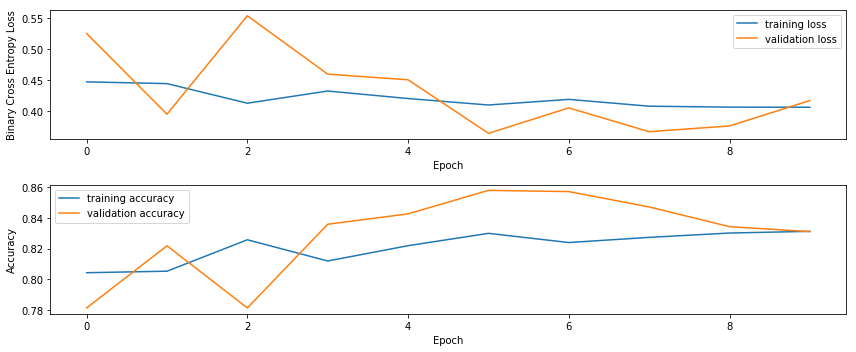

11959/11959 [==============================] - 0s 16us/step
Test Loss: 0.3520259168614252
Test Accuracy: 0.8610251693285392


In [21]:
X_train_rf = df_train.drop(columns=['RainTomorrow', 'Rainfall']).values
X_test_rf = df_test.drop(columns=['RainTomorrow', 'Rainfall']).values
X_val_rf = df_val.drop(columns=['RainTomorrow', 'Rainfall']).values

INPUT_DIM = X_train_rf.shape[1]
OUTPUT_DIM = 1
EPOCHS = 10
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(16, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(16, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])

history = History()
model.fit(X_train_rf, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_rf, y_val), callbacks=[history])

val_loss_rf = history.history['val_loss']
train_loss_rf = history.history['loss']
val_acc_rf = history.history['val_acc']
train_acc_rf = history.history['acc']
plt.rcParams['figure.figsize'] = [12, 5]

ax1_rf = plt.subplot(211)
ax2_rf = plt.subplot(212)

# Loss Axis
ax1_rf.plot(list(range(EPOCHS)), train_loss_rf)
ax1_rf.plot(list(range(EPOCHS)), val_loss_rf)
ax1_rf.set_xlabel('Epoch')
ax1_rf.legend(['training loss', 'validation loss'])
ax1_rf.set_ylabel('Binary Cross Entropy Loss')

# Accuracy Axis
ax2_rf.plot(list(range(EPOCHS)), train_acc_rf)
ax2_rf.plot(list(range(EPOCHS)), val_acc_rf)
ax2_rf.legend(['training accuracy', 'validation accuracy'])
ax2_rf.set_xlabel('Epoch')
ax2_rf.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

test_loss_rf, test_acc_rf, t = model.evaluate(X_test_rf, y_test)
print(f"Test Loss: {test_loss_rf}\nTest Accuracy: {test_acc_rf}")

#### Pressure 9am

Train on 83713 samples, validate on 23918 samples
Epoch 1/10
83713/83713 [==============================] - 4s 44us/step - loss: 0.4442 - acc: 0.8065 - binary_crossentropy: 0.4442 - val_loss: 0.3702 - val_acc: 0.8429 - val_binary_crossentropy: 0.3702
Epoch 2/10
83713/83713 [==============================] - 2s 20us/step - loss: 0.4029 - acc: 0.8301 - binary_crossentropy: 0.4029 - val_loss: 0.4490 - val_acc: 0.7814 - val_binary_crossentropy: 0.4490
Epoch 3/10
83713/83713 [==============================] - 1s 13us/step - loss: 0.4039 - acc: 0.8288 - binary_crossentropy: 0.4039 - val_loss: 0.3922 - val_acc: 0.8492 - val_binary_crossentropy: 0.3922
Epoch 4/10
83713/83713 [==============================] - 1s 15us/step - loss: 0.3993 - acc: 0.8328 - binary_crossentropy: 0.3993 - val_loss: 0.3767 - val_acc: 0.8555 - val_binary_crossentropy: 0.3767
Epoch 5/10
83713/83713 [==============================] - 1s 15us/step - loss: 0.3974 - acc: 0.8334 - binary_crossentropy: 0.3974 - val_loss: 0.36

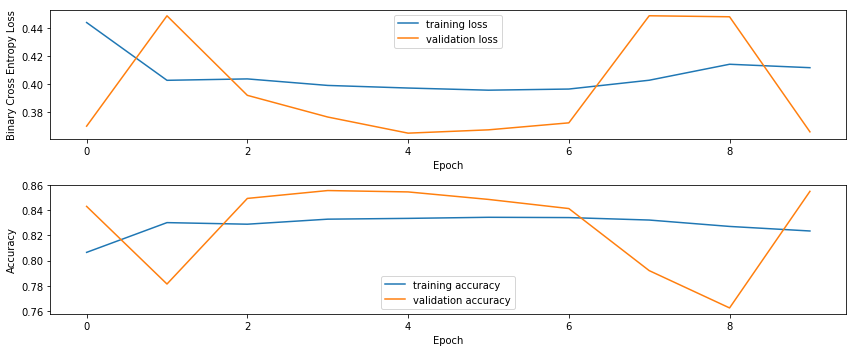

11959/11959 [==============================] - 0s 17us/step
Test Loss: 0.32791360480007953
Test Accuracy: 0.8687181202441676


In [22]:
X_train_p9am = df_train.drop(columns=['RainTomorrow', 'Pressure9am']).values
X_test_p9am = df_test.drop(columns=['RainTomorrow', 'Pressure9am']).values
X_val_p9am = df_val.drop(columns=['RainTomorrow', 'Pressure9am']).values

INPUT_DIM = X_train_p9am.shape[1]
OUTPUT_DIM = 1
EPOCHS = 10
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(16, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(16, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])

history = History()
model.fit(X_train_p9am, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_p9am, y_val), callbacks=[history])

val_loss_p9am = history.history['val_loss']
train_loss_p9am = history.history['loss']
val_acc_p9am = history.history['val_acc']
train_acc_p9am = history.history['acc']
plt.rcParams['figure.figsize'] = [12, 5]

ax1_p9am = plt.subplot(211)
ax2_p9am = plt.subplot(212)

# Loss Axis
ax1_p9am.plot(list(range(EPOCHS)), train_loss_p9am)
ax1_p9am.plot(list(range(EPOCHS)), val_loss_p9am)
ax1_p9am.set_xlabel('Epoch')
ax1_p9am.legend(['training loss', 'validation loss'])
ax1_p9am.set_ylabel('Binary Cross Entropy Loss')

# Accuracy Axis
ax2_p9am.plot(list(range(EPOCHS)), train_acc_p9am)
ax2_p9am.plot(list(range(EPOCHS)), val_acc_p9am)
ax2_p9am.legend(['training accuracy', 'validation accuracy'])
ax2_p9am.set_xlabel('Epoch')
ax2_p9am.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

test_loss_p9am, test_acc_p9am, t = model.evaluate(X_test_p9am, y_test)
print(f"Test Loss: {test_loss_p9am}\nTest Accuracy: {test_acc_p9am}")

In [23]:
result = {'Models':['Base line','Without Humidity 3pm',"Without Rain Today", 'Without Humidity 9am','Without Rainfall','Without Pressure 9am'], 
          'Test Accuracy':[test_acc, test_acc_h3pm, test_acc_rt, test_acc_h9am,test_acc_rf, test_acc_p9am]}
result_df = pd.DataFrame(data = result)
result_df['Difference from Base line'] = [test_acc - i for i in result_df['Test Accuracy']]
result_df.sort_values(by = 'Difference from Base line', ascending=False).set_index('Models')

,Test Accuracy,Difference from Base line
Models,,
Without Humidity 3pm,0.820303,0.053934
Without Humidity 9am,0.852162,0.022075
Without Rainfall,0.861025,0.013212
Without Pressure 9am,0.868718,0.005519
Base line,0.874237,0.000000
Without Rain Today,0.875909,-0.001672


In [24]:
#TODO: Add a summary plot base on the df above.

#Note (by Xuanyu): I think we probably can combine the accuracy plot for each model into one plot 
#or don't use them at all, because it seems that we only need the final test accuracy

## Result
From the result we get above, we can see that the most significant feature in our prediction is Humidity at 3pm, which proved our hypothesis that humidity is more influencial on the weather next day. 

## Throw out plots

In [ ]:
# I also included the graph of correlations to RainToday below. That might make more sense to analyze instead of the correlations to amount of rainfall
rainfall_corrs = corrs[['Rainfall']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'Rainfall', data = rainfall_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to Rainfall')

In [ ]:
raintoday_corrs = corrs[['RainToday']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'RainToday', data = raintoday_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to RainToday')